<a href="https://colab.research.google.com/github/Hamzahmed/Analysis/blob/main/Levitate_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing packages
import pandas as pd
import numpy as np
#import datetime as dt
from google.colab import files
import io
import timeit
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import resource
sys.setrecursionlimit(2000)
sys.getrecursionlimit()

2000

In [ ]:
#upload files
uploaded = files.upload()
resource.getrusage(resource.RUSAGE_SELF).ru_maxrss


Saving Activities_from_Hubspot.xlsx to Activities_from_Hubspot (1).xlsx
Saving Team.xlsx to Team (1).xlsx


180128

In [ ]:
#reading files
start = timeit.default_timer()
activities = pd.read_excel(io.BytesIO(uploaded['Activities_from_Hubspot.xlsx']))
teams = pd.read_excel(io.BytesIO(uploaded['Team.xlsx']))
stop = timeit.default_timer()
print('Time: ', stop - start) 
resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

Time:  0.18236102599999526


145028

In [ ]:
#Xlookup(ing) here
start = timeit.default_timer()
activities.merge(teams, how = 'left', left_on='Rep Name', right_on='Team')
#pd.concat([activities, teams], axis = 0)
stop = timeit.default_timer()
print('Time: ', stop - start) 
resource.getrusage(resource.RUSAGE_SELF).ru_maxrss


Time:  0.014933401000007507


146468

In [ ]:
#changing 'Create date' to hours
start = timeit.default_timer()
activities['Hours'] = activities['Create date'].dt.hour
stop = timeit.default_timer()
print('Time: ', stop - start) 
resource.getrusage(resource.RUSAGE_SELF).ru_maxrss


Time:  0.004366125000004217


146468

In [ ]:
#I wanted to drop 'Create date' column just for visulization purposes and see what columns we have
start = timeit.default_timer()
activities = activities.drop('Create date',axis= 1)
print (activities.columns.tolist())
stop = timeit.default_timer()
print('Time: ', stop - start) 
resource.getrusage(resource.RUSAGE_SELF).ru_maxrss


['Engagement ID', 'Activity type', 'Rep Name', 'Hours']
Time:  0.002638082999993685


146764

In [ ]:
#Pivoting table! Here I used pivot table and we get hours for Rep Name and Engagement ID. 
start = timeit.default_timer()
activities = pd.pivot_table(activities, values=None, index= ['Rep Name'], columns = 'Hours', aggfunc = ['count'], fill_value=0, margins=True, margins_name='Grand Total')
stop = timeit.default_timer()
print('Time: ', stop - start) 
resource.getrusage(resource.RUSAGE_SELF).ru_maxrss


Time:  0.06920724100000086


147936

170528

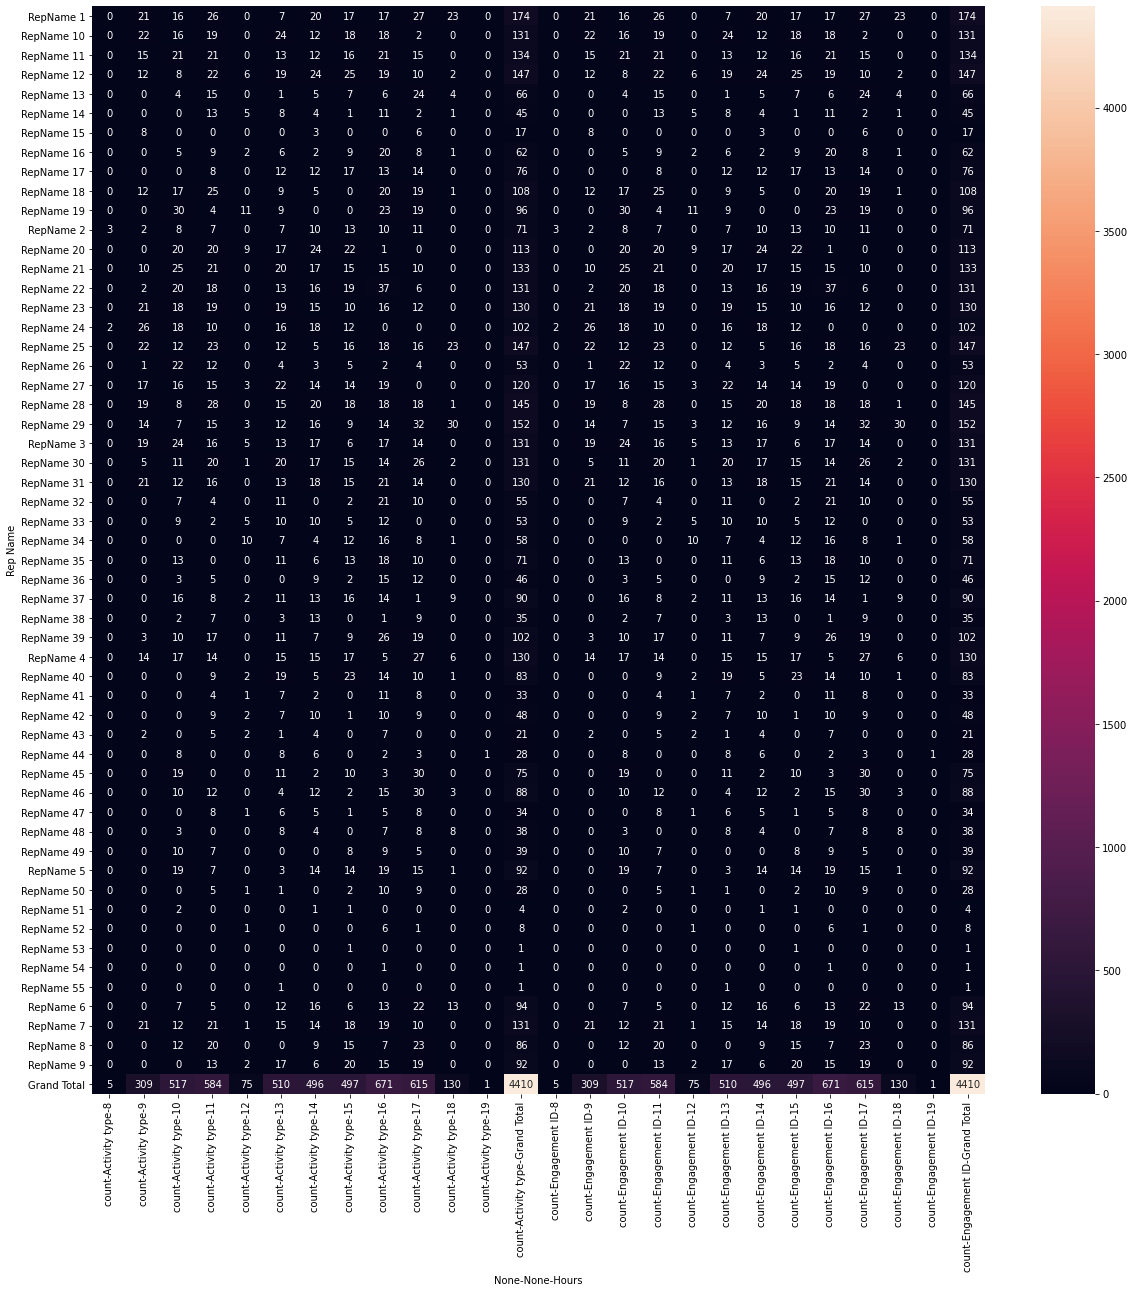

In [ ]:
#creating heatmap but I need more research on it! There are some alternative visualizations we could use that we can discuss, but I can also 
#figure out how to do heatmap on python. This is going to be fun since I can find new creative ways for visualizing data!
fig, ax = plt.subplots(figsize=(20,20))

ax = sns.heatmap(activities, annot=True, fmt="d")
resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
